In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/ai-3 project_neha'

/content/drive/.shortcut-targets-by-id/1dgZlAKh4UAo5UOK4f1TVyEee7vs8FKQY/ai-3 project_neha


###Installing and importing libraries

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 15.7 MB/s 
     |████████████████████████████████| 7.6 MB 56.4 MB/s 
     |████████████████████████████████| 182 kB 80.3 MB/s 


In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110 kB 14.0 MB/s 
     |████████████████████████████████| 287 kB 74.2 MB/s 


In [ ]:
!pip install faiss-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85.5 MB 83 kB/s 


In [ ]:
#Importing necessary libraries
from transformers import BertTokenizer, TFAutoModel
import pandas as pd
import re
import os
import numpy as np
import contractions
import faiss
import wordcloud
import tensorflow as tf
from sklearn import manifold
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from wordcloud import WordCloud, STOPWORDS
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from transformers import GPT2Tokenizer,TFGPT2LMHeadModel

**MODEL ARCHITECTURE**

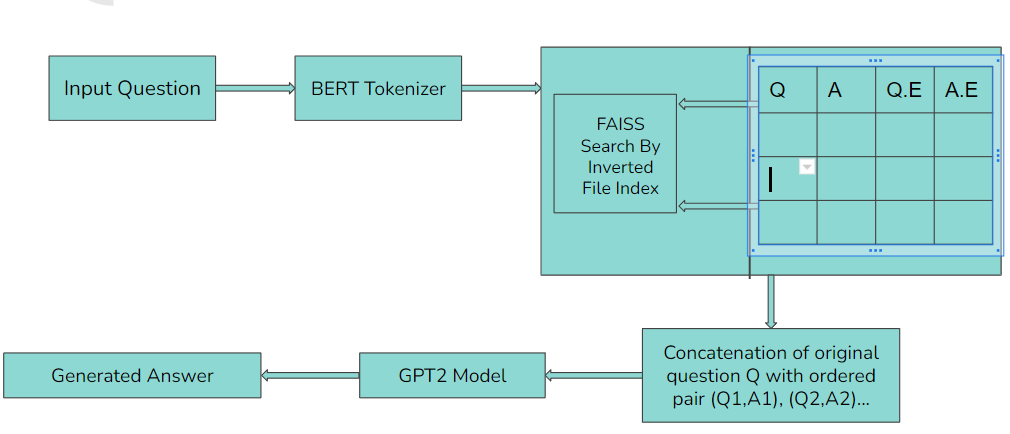

###Some EDA!!!

In [ ]:
pd.set_option('display.max_columns', 50)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/QueryResults.csv')
data.head()

,Id,AcceptedAnswerId,CreationDate,Title,Body,Tags,Answer Body
0,74681410,74681473,2022-12-04 22:13:23,Why my batch script its creating standard user...,<p>I'm trying to run the following command to ...,<windows><batch-file>,<p>It looks like you are using the correct com...
1,74681374,74681447,2022-12-04 22:08:28,What's the name of flutter widget that has ico...,<p>What's the name of the Flutter widget that ...,<flutter><dart><user-interface>,<p>this bottom navigation bar can be done usin...
2,74681306,74681347,2022-12-04 21:59:26,Problem using C. Program works then acts diffe...,<p>So in my program I retrieve a command line ...,<arrays><c><for-loop>,<p>here you have created zero size arrays</p>\...
3,74681288,74681305,2022-12-04 21:56:19,How to reorder a numpy array by giving each el...,<p>I want to <strong>reorder</strong> a numpy ...,<python><arrays><numpy>,<p>To reorder the elements in a NumPy array ac...
4,74681279,74681334,2022-12-04 21:55:08,How to locate a specific var type inside many ...,<p>I'd like know how can I localize a specific...,<python><list><numpy><indexing><filter>,<p>Here is an example of how you could use the...


In [ ]:
data['Body'] = data['Body'].apply(lambda x: x[3:])
data['Answer Body'] = data['Answer Body'].apply(lambda x: x[3:-5])
data['Tags'] = data['Tags'].apply(lambda x: x[1:-1])
data['Tags'] = data['Tags'].apply(lambda x: x.split('><'))
data.head()

,Id,AcceptedAnswerId,CreationDate,Title,Body,Tags,Answer Body
0,74681410,74681473,2022-12-04 22:13:23,Why my batch script its creating standard user...,I'm trying to run the following command to gen...,"[windows, batch-file]",It looks like you are using the correct comman...
1,74681374,74681447,2022-12-04 22:08:28,What's the name of flutter widget that has ico...,What's the name of the Flutter widget that has...,"[flutter, dart, user-interface]",this bottom navigation bar can be done using <...
2,74681306,74681347,2022-12-04 21:59:26,Problem using C. Program works then acts diffe...,So in my program I retrieve a command line arg...,"[arrays, c, for-loop]",here you have created zero size arrays</p>\n<p...
3,74681288,74681305,2022-12-04 21:56:19,How to reorder a numpy array by giving each el...,I want to <strong>reorder</strong> a numpy arr...,"[python, arrays, numpy]",To reorder the elements in a NumPy array accor...
4,74681279,74681334,2022-12-04 21:55:08,How to locate a specific var type inside many ...,I'd like know how can I localize a specific ty...,"[python, list, numpy, indexing, filter]",Here is an example of how you could use these ...


In [ ]:
data.to_csv('preprocessed_data.csv')

In [ ]:
data['Answer Body'].iloc[0]


'It looks like you are using the correct commands to create a user and add them to the local Administrators group. However, the issue may be with the <strong>net user</strong> command.</p>\n<p>The <strong>net user</strong> command has a parameter called <strong>/add</strong> which is used to create a new user account. However, this parameter does not specify that the user is an administrator.</p>\n<p>To create an administrator user, you need to use the <strong>/add</strong> parameter along with the <strong>/active:yes</strong> and /<strong>passwordchg:no</strong> parameters. These parameters specify that the user account is active and that the user cannot change their password.</p>\n<p>Here is an updated version of the commands that you can use to create an administrator user:</p>\n<pre><code>net user %username% %password% /add /active:yes /passwordchg:no\nnet localgroup Administrators %username% /add\n</code></pre>\n<p>These commands should create the admin user and add them to the lo

In [ ]:
data['Question Length'] = data['Body'].apply(lambda x : len(x))
data['Answer Length'] = data['Answer Body'].apply(lambda x : len(x))
data.head()

,Id,AcceptedAnswerId,CreationDate,Title,Body,Tags,Answer Body,Question Length,Answer Length
0,74681410,74681473,2022-12-04 22:13:23,Why my batch script its creating standard user...,I'm trying to run the following command to gen...,"[windows, batch-file]",It looks like you are using the correct comman...,602,1119
1,74681374,74681447,2022-12-04 22:08:28,What's the name of flutter widget that has ico...,What's the name of the Flutter widget that has...,"[flutter, dart, user-interface]",this bottom navigation bar can be done using <...,471,870
2,74681306,74681347,2022-12-04 21:59:26,Problem using C. Program works then acts diffe...,So in my program I retrieve a command line arg...,"[arrays, c, for-loop]",here you have created zero size arrays</p>\n<p...,3167,273
3,74681288,74681305,2022-12-04 21:56:19,How to reorder a numpy array by giving each el...,I want to <strong>reorder</strong> a numpy arr...,"[python, arrays, numpy]",To reorder the elements in a NumPy array accor...,550,399
4,74681279,74681334,2022-12-04 21:55:08,How to locate a specific var type inside many ...,I'd like know how can I localize a specific ty...,"[python, list, numpy, indexing, filter]",Here is an example of how you could use these ...,585,1312


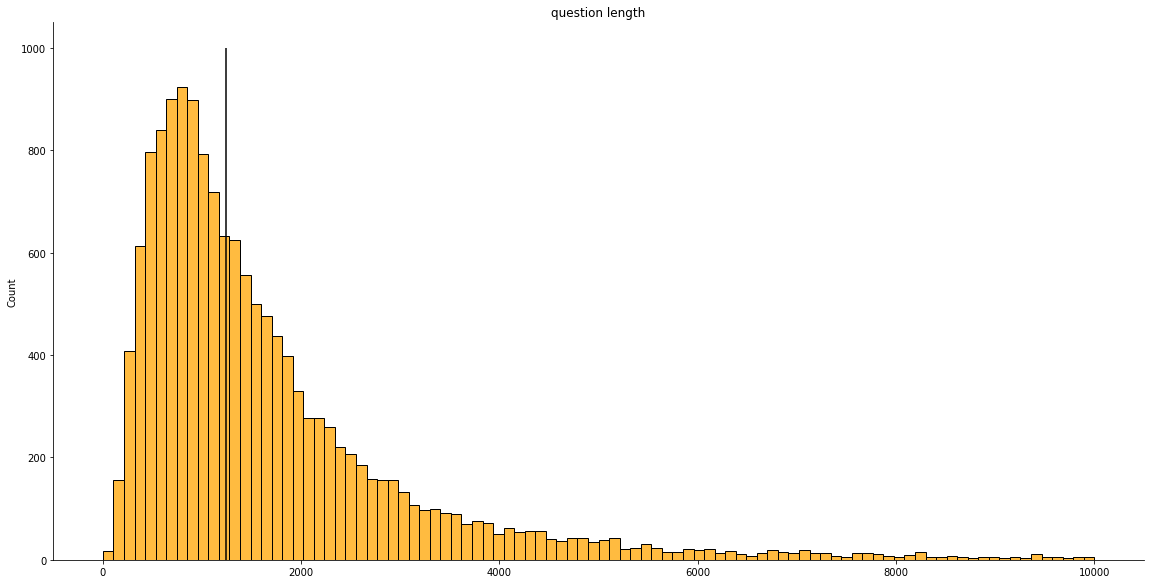

median: 1241.0


In [ ]:
# Question length distribution : What is the median length of questions?
q_lengths = list(data['Question Length'])
sns.displot(q_lengths, height = 8, aspect = 2, binrange=(0, 10000), color = '#ffa500')
plt.vlines(np.median(q_lengths), 0, 1000, colors='black')
plt.title("question length")
plt.show()
print("median:", np.median(q_lengths))

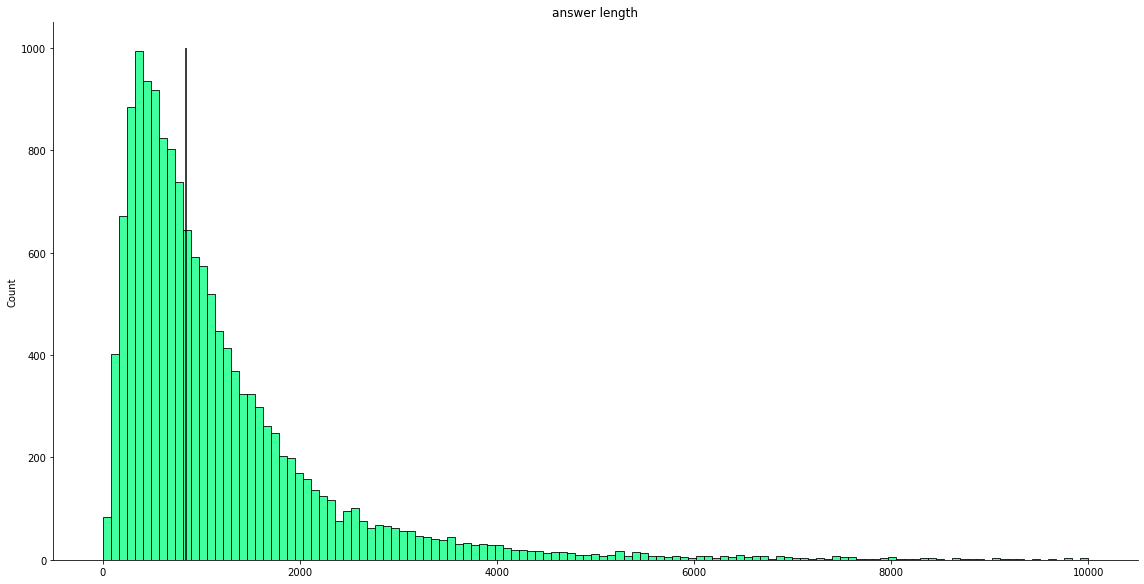

median: 843.5


In [ ]:
# Answer length distribution : What is the median length for the answers?
a_lengths = list(data['Answer Length'])
sns.displot(a_lengths, height = 8, aspect = 2, binrange=(0, 10000), color = 'springgreen')
plt.vlines(np.median(a_lengths), 0, 1000, colors='black')
plt.title("answer length")
plt.show()
print("median:", np.median(a_lengths))

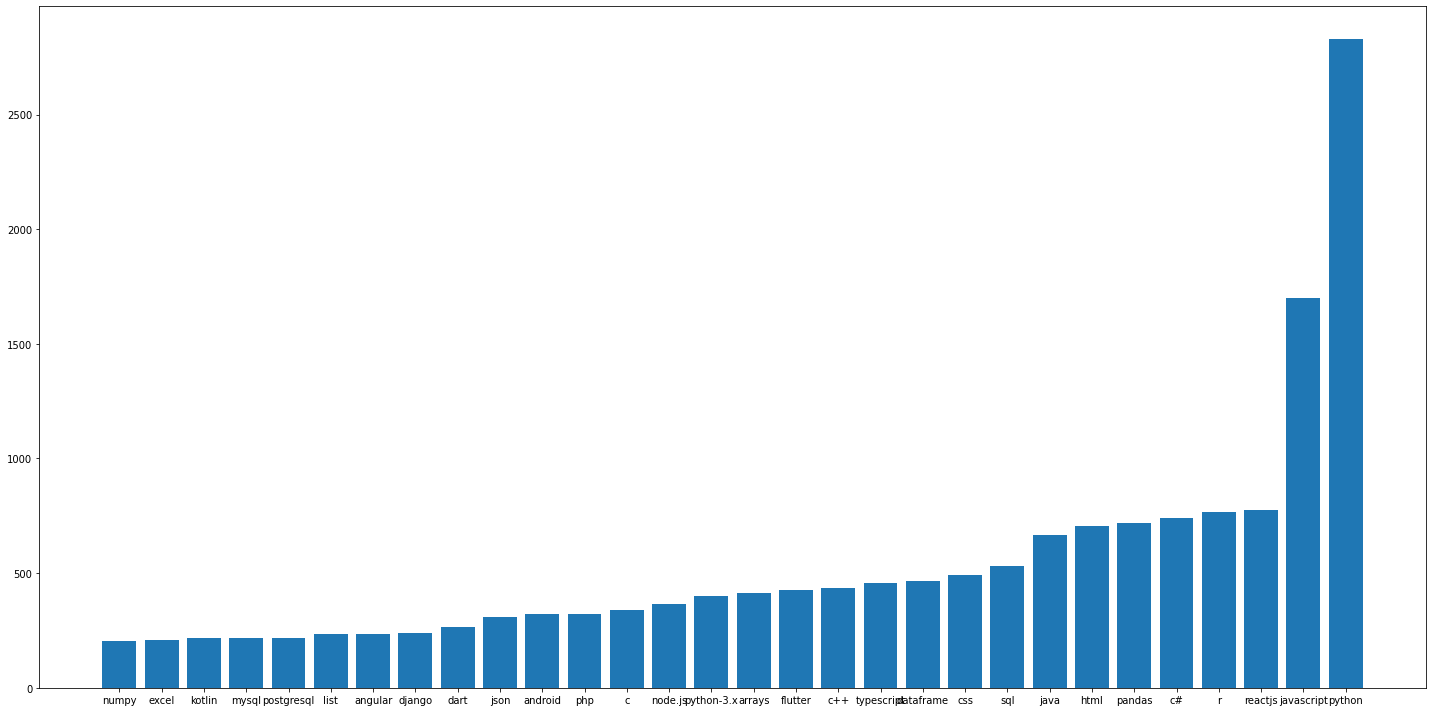

In [ ]:

# Which tag is most repeating, this tells us which are the most popular programming languages/concepts that people have doubts with
df = data['Tags'].str.join('|').str.get_dummies()
tag_list = list(df.columns)
dict_tag = {}
for i in tag_list:
  dict_tag[i] = df[i].sum()
sorted_dict = dict(sorted(dict_tag.items(), key=lambda item: item[1]))

names = list(sorted_dict.keys())[-30:]
values = list(sorted_dict.values())[-30:]

font = {'size': 10}
plt.rc('font', **font)
fig = plt.figure(figsize = (20,10))
plt.bar(range(30), values, tick_label=names)
plt.tight_layout()
plt.show()

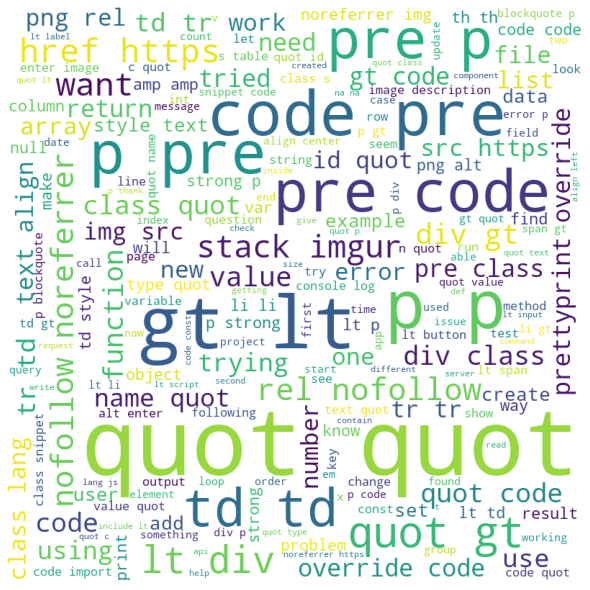

In [ ]:
# wordcloud for questions : what words repeat most in the questions
comments = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in data.Body:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comments += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comments)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

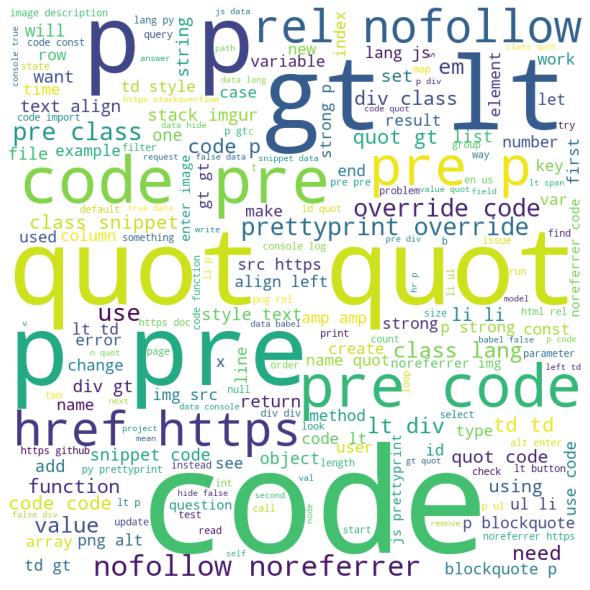

In [ ]:
# wordcloud for answers : which words are most prevalent in the answers?
comments = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in data['Answer Body']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comments += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comments)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### Defining tokenizer and tokenizing model

In [ ]:
## Tokenizer
tokenizer=BertTokenizer.from_pretrained('bert-base-uncased',do_lower_case=True)
## Bert model
tokenizing_model = TFAutoModel.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
tokenizing_model.summary()

Model: "tf_bert_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
Total params: 109,482,240
Trainable params: 109,482,240
Non-trainable params: 0
_________________________________________________________________


### Creating and preprocessing Stackexchange dataset

In [ ]:
#Loading Stack Exchange data
qa_data=pd.read_csv('./preprocessed_data.csv', index_col=None)

In [ ]:
qa_data.head()

,Unnamed: 0,Id,AcceptedAnswerId,CreationDate,Title,Body,Tags,Answer Body
0,0,74681410,74681473,2022-12-04 22:13:23,Why my batch script its creating standard user...,I'm trying to run the following command to gen...,"['windows', 'batch-file']",It looks like you are using the correct comman...
1,1,74681374,74681447,2022-12-04 22:08:28,What's the name of flutter widget that has ico...,What's the name of the Flutter widget that has...,"['flutter', 'dart', 'user-interface']",this bottom navigation bar can be done using <...
2,2,74681306,74681347,2022-12-04 21:59:26,Problem using C. Program works then acts diffe...,So in my program I retrieve a command line arg...,"['arrays', 'c', 'for-loop']",here you have created zero size arrays</p>\n<p...
3,3,74681288,74681305,2022-12-04 21:56:19,How to reorder a numpy array by giving each el...,I want to <strong>reorder</strong> a numpy arr...,"['python', 'arrays', 'numpy']",To reorder the elements in a NumPy array accor...
4,4,74681279,74681334,2022-12-04 21:55:08,How to locate a specific var type inside many ...,I'd like know how can I localize a specific ty...,"['python', 'list', 'numpy', 'indexing', 'filter']",Here is an example of how you could use these ...


In [ ]:
#Taking relevant columns from the dataframe for further processing
qa_data = qa_data[['Body', 'Answer Body', 'Tags']]
qa_data.head()

,Body,Answer Body,Tags
0,I'm trying to run the following command to gen...,It looks like you are using the correct comman...,"['windows', 'batch-file']"
1,What's the name of the Flutter widget that has...,this bottom navigation bar can be done using <...,"['flutter', 'dart', 'user-interface']"
2,So in my program I retrieve a command line arg...,here you have created zero size arrays</p>\n<p...,"['arrays', 'c', 'for-loop']"
3,I want to <strong>reorder</strong> a numpy arr...,To reorder the elements in a NumPy array accor...,"['python', 'arrays', 'numpy']"
4,I'd like know how can I localize a specific ty...,Here is an example of how you could use these ...,"['python', 'list', 'numpy', 'indexing', 'filter']"


In [ ]:
#Function for preprocessing tags
def tag_preprocessing(tags):
  tags=tags[1:-1]
  tags=tags.replace("\'",'')
  return np.array(tags.split(', '))

In [ ]:
qa_data['Tags']=qa_data['Tags'].apply(lambda x: tag_preprocessing(x))
qa_data.head()

,Body,Answer Body,Tags
0,I'm trying to run the following command to gen...,It looks like you are using the correct comman...,"[windows, batch-file]"
1,What's the name of the Flutter widget that has...,this bottom navigation bar can be done using <...,"[flutter, dart, user-interface]"
2,So in my program I retrieve a command line arg...,here you have created zero size arrays</p>\n<p...,"[arrays, c, for-loop]"
3,I want to <strong>reorder</strong> a numpy arr...,To reorder the elements in a NumPy array accor...,"[python, arrays, numpy]"
4,I'd like know how can I localize a specific ty...,Here is an example of how you could use these ...,"[python, list, numpy, indexing, filter]"


In [ ]:
def preprocess(text):

    #Changes into lowercase
    text = text.lower()

    #Preprocesses contractions
    text = contractions.fix(text)

    #Remove unnecessary characters
    text = re.sub('[$)\?"’.°!;\'€%:,(/]', '', text)
    text = re.sub("[\<\[].*?[\>\]]", "", text)
    text = re.sub('-', ' ', text)
    return text


qa_data['preprocessed_qbody'] = qa_data['Body'].apply(preprocess)
qa_data['preprocessed_abody'] = qa_data['Answer Body'].apply(preprocess)
qa_data.head()

,Body,Answer Body,Tags,preprocessed_qbody,preprocessed_abody
0,I'm trying to run the following command to gen...,It looks like you are using the correct comman...,"[windows, batch-file]",i am trying to run the following command to ge...,it looks like you are using the correct comman...
1,What's the name of the Flutter widget that has...,this bottom navigation bar can be done using <...,"[flutter, dart, user-interface]",what is the name of the flutter widget that ha...,this bottom navigation bar can be done using b...
2,So in my program I retrieve a command line arg...,here you have created zero size arrays</p>\n<p...,"[arrays, c, for-loop]",so in my program i retrieve a command line arg...,here you have created zero size arrays\nchar l...
3,I want to <strong>reorder</strong> a numpy arr...,To reorder the elements in a NumPy array accor...,"[python, arrays, numpy]",i want to reorder a numpy array such that each...,to reorder the elements in a numpy array accor...
4,I'd like know how can I localize a specific ty...,Here is an example of how you could use these ...,"[python, list, numpy, indexing, filter]",i would like know how can i localize a specifi...,here is an example of how you could use these ...


In [ ]:
# length of preprocessed questions and answers body
qa_data['qlen']=qa_data['preprocessed_qbody'].apply(lambda x: len(x.split(' ')))
qa_data['alen']=qa_data['preprocessed_abody'].apply(lambda x: len(x.split(' ')))

In [ ]:
#Calculating the 90 and 95th percentile of questions and answers length
print(f"The 90th and 95th percentile of question lengths is {np.percentile(qa_data['qlen'],90)} and {np.percentile(qa_data['qlen'],95)} respectively")
print(f"The 90th and 95th percentile of answer lengths is {np.percentile(qa_data['alen'],90)} and {np.percentile(qa_data['alen'],95)} respectively")

The 90th and 95th percentile of question lengths is 701.0 and 1067.0 respectively
The 90th and 95th percentile of answer lengths is 412.0 and 614.0 respectively


So, we can say that 95 percent of the question/answer data lie in the range of approx 1000 words

In [ ]:
qa_data.head()

,Body,Answer Body,Tags,preprocessed_qbody,preprocessed_abody,qlen,alen
0,I'm trying to run the following command to gen...,It looks like you are using the correct comman...,"[windows, batch-file]",i am trying to run the following command to ge...,it looks like you are using the correct comman...,90,152
1,What's the name of the Flutter widget that has...,this bottom navigation bar can be done using <...,"[flutter, dart, user-interface]",what is the name of the flutter widget that ha...,this bottom navigation bar can be done using b...,55,124
2,So in my program I retrieve a command line arg...,here you have created zero size arrays</p>\n<p...,"[arrays, c, for-loop]",so in my program i retrieve a command line arg...,here you have created zero size arrays\nchar l...,851,36
3,I want to <strong>reorder</strong> a numpy arr...,To reorder the elements in a NumPy array accor...,"[python, arrays, numpy]",i want to reorder a numpy array such that each...,to reorder the elements in a numpy array accor...,66,50
4,I'd like know how can I localize a specific ty...,Here is an example of how you could use these ...,"[python, list, numpy, indexing, filter]",i would like know how can i localize a specifi...,here is an example of how you could use these ...,84,291


In [ ]:
#Cropping the body of question and answer to 1024
qa_data['cropped_ques']=qa_data.apply(lambda x: ' '.join(x.preprocessed_qbody.split(' ')[:1000]) if x.qlen>1000 else x.preprocessed_qbody ,axis=1)
qa_data['cropped_ans']=qa_data.apply(lambda x: ' '.join(x.preprocessed_abody.split(' ')[:1000]) if x.alen>1000 else x.preprocessed_abody ,axis=1)

In [ ]:
#Creating positive samples from the dataset
processed_df=qa_data[['cropped_ques','cropped_ans','Tags']].copy()
processed_df['label']=1.0

***Generation of negative samples:***
We created negative samples as Original question - random answer from the dataset and the corresponding tags. We generated random answer by randomly sampling a row from the dataset and finding similarity in tags from the positive row tags using set-intersection. If there are not similar tags, we return the sampled row answer and take it as negative sample. If there are similar tags, we repeat this process until we find a row with no similar tags.

We are choosing intersection of tags as questions coming under same tags might have similar features/embeddings so to avoid that we generate a sample from a row with completely different tags

In [ ]:
#Function to create negative samples using tags
def create_neg_samples(question,tags):
  loop=True
  while (loop):
    random_row= processed_df.sample()
    corr_tags=random_row.Tags.values[0]
    com_tags=set(tags[0]).intersection(set(corr_tags)) #Common tags
    if len(com_tags)==0:
      loop=False
  return random_row

In [ ]:
#Generating negative samples
negative_samples=processed_df.apply(lambda x: pd.Series([x.cropped_ques,create_neg_samples(x.cropped_ques,x.Tags).cropped_ans.values[0],x.Tags]),axis=1)
negative_samples['match']=-1.0
negative_samples.columns=['cropped_ques','cropped_ans','Tags','label']

In [ ]:
#Merging the positive and negative labelled dataframes to get the final labelled dataset.
final_df=pd.concat([processed_df,negative_samples],axis=0)
final_df.shape

(30000, 4)

In [ ]:
#splitting the data into train and validation
train_df, val_df = train_test_split(final_df, test_size=0.2,random_state=42,shuffle=True,stratify=final_df.label)

In [ ]:
#saving train and validation data
train_df.to_csv('./train.csv',index=False)
val_df.to_csv('./validation.csv',index=False)

In [ ]:
#loading train and validation data
train_df=pd.read_csv('./train.csv')
val_df=pd.read_csv('./validation.csv')

In [ ]:
#displaying the train dataset
train_df.head()

,cropped_ques,cropped_ans,Tags,label
0,today i encountered an old part of our ansible...,i suggest you to revise you flow without a pub...,['ansible'],-1.0
1,so i am trying to code an observer pattern in ...,here is an approach that preserves the origina...,['python' 'self'],-1.0
2,i have a data frame with 9 observations of two...,since you are using lubridate and dplyr here i...,['r' 'dataframe' 'date' 'sequence'],1.0
3,i have the following dictionary\nmy_dict = {fi...,i do not know why would you need pandas for th...,['python' 'pandas' 'numpy' 'dictionary' 'nan'],1.0
4,my athenapresto database has a serialized json...,your json is actually double encoded one ie it...,['sql' 'arrays' 'json' 'presto' 'trino'],1.0


In [ ]:
#Taking questions, answers and labels from the training and validation dataset
ques=train_df['cropped_ques']
ans=train_df['cropped_ans']
labs=train_df['label']
val_ques=val_df['cropped_ques']
val_ans=val_df['cropped_ans']
val_labs=val_df['label']

### Creating model for extracting Bert embeddings

In [ ]:

# Tokenize
maxlen=512
def tokenize(qs, ans):
  tokenized_qs, tokenized_as = [], []

  for (q, a) in zip(qs, ans):
    # Encoding questions and answers using tokenizer
    tokenized_q =  tokenizer.encode(q)
    tokenized_a = tokenizer.encode(a)
    tokenized_qs.append(tokenized_q)
    tokenized_as.append(tokenized_a)

  # padding questions and answers
  tokenized_qs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_qs, padding='post', maxlen=maxlen)
  tokenized_as = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_as, padding='post', maxlen=maxlen)

  return tokenized_qs, tokenized_as

#Tokenising the question and answers
tokenized_ques, tokenized_ans = tokenize(ques, ans)
val_tokenized_ques, val_tokenized_ans = tokenize(val_ques, val_ans)

Token indices sequence length is longer than the specified maximum sequence length for this model (753 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
#Creating mask for question and answer body such that the model focuses on the actual content and not the padding
train_q_mask=[[1 if tok!=0 else 0 for tok in ques] for ques in tokenized_ques]
train_a_mask=[[1 if tok!=0 else 0 for tok in ans] for ans in tokenized_ans]
val_q_mask=[[1 if tok!=0 else 0 for tok in ques] for ques in val_tokenized_ques]
val_a_mask=[[1 if tok!=0 else 0 for tok in ans] for ans in val_tokenized_ans]

In [ ]:
#Creating TF dataset
#TRAINING
BATCH_SIZE = 2
BUFFER_SIZE = 20000
train_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'ques': tokenized_ques,
        'ans': tokenized_ans,
        'q_mask':train_q_mask,
        'a_mask':train_a_mask
    },
    {
        'label': labs.values
    },
))


train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE,drop_remainder=True)
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)

#VALIDATION

val_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'ques': val_tokenized_ques,
        'ans': val_tokenized_ans,
        'q_mask':val_q_mask,
        'a_mask':val_a_mask
    },
    {
        'label': val_labs.values
    },
))

val_dataset = val_dataset.cache()
val_dataset = val_dataset.shuffle(BUFFER_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE,drop_remainder=True)
val_dataset = val_dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
#Defining custom model for training Bert

class QA_Bert_encoder(tf.keras.Model):
    def __init__(
            self,
            trainable=False,
            name=''):
        super(QA_Bert_encoder, self).__init__(name=name)

        self.qffn_layer = tf.keras.layers.Dense(units=1024, activation='relu', name='qffn')
        self.affn_layer = tf.keras.layers.Dense(units=1024, activation='relu', name='affn')
        self.dropout = Dropout(0.2)
        self.bert_encoder=tokenizing_model
        self.bert_encoder.trainable=trainable
        self.cosine_sim=tf.keras.layers.Dot(axes=1,normalize=True)

    def call(self, inputs):
      ques_embeds=self.bert_encoder(input_ids=inputs['ques'],attention_mask=inputs['q_mask']).pooler_output
      ans_embeds=self.bert_encoder(input_ids=inputs['ans'],attention_mask=inputs['a_mask']).pooler_output
      qffnn=self.qffn_layer(ques_embeds)
      qffnn = self.dropout(qffnn)
      affnn=self.affn_layer(ans_embeds)
      affnn = self.dropout(affnn)
      output=self.cosine_sim([qffnn,affnn])
      return {"label":output}

In [ ]:
#Compiling and training the model

#Hyperparameters
epochs=1
learning_rate=5e-6
optimizer = tf.keras.optimizers.Adam(learning_rate)
stack_qa_model=QA_Bert_encoder(trainable=True)
# stack_qa_model.compile(optimizer=optimizer, loss='BinaryCrossentropy')
# stack_qa_model.fit(train_dataset, validation_data= val_dataset, epochs=epochs, verbose=1)
# stack_qa_model.summary()

In [ ]:
stack_qa_model.save_weights('./encoder_weights')

### Extracting embeddings from fine-tuned Bert model

In [ ]:
#loading the weights of stack qa model
stack_qa_model=QA_Bert_encoder(trainable=True)
stack_qa_model.load_weights('./encoder_weights')

In [ ]:
#Question embedder model
x1=tf.keras.layers.Input((512),name='ques',dtype='int64')
x2=tf.keras.layers.Input((512),name='ques_mask',dtype='int64')
q_embeddings=stack_qa_model.get_layer('qffn')(stack_qa_model.get_layer('tf_bert_model').bert(input_ids=x1,attention_mask=x2,).pooler_output)
question_embedder=tf.keras.Model(inputs=[x1,x2],outputs=q_embeddings)

In [ ]:
#saving the question embedder model
question_embedder.save('./question_embedder')

In [ ]:
#loading the question embedder model
question_embedder=tf.keras.models.load_model('./question_embedder')

In [ ]:
#function to extract question/answer embeddings
def embedding_extractor(qa, ques=1):

  tokenized_qa=[]
  ##Pre-processing
  #Tokenizing
  tokenized =  tokenizer.encode(qa)
  tokenized_qa.append(tokenized)

  # padding
  tokenized_qa = tf.keras.preprocessing.sequence.pad_sequences(tokenized_qa, padding='post', maxlen=maxlen)
  atten_mask=[[1 if token>0 else 0 for token in i] for i in tokenized_qa]
  if ques:
    embeddings=question_embedder({'ques':np.array(tokenized_qa),'ques_mask':np.array(atten_mask)})
  else:
    embeddings= answer_embedder({'ans':np.array(tokenized_qa),'ans_mask':np.array(atten_mask)})
  return embeddings



In [ ]:
#Answer embedder model
x1=tf.keras.layers.Input((512),name='ans',dtype='int64')
x2=tf.keras.layers.Input((512),name='ans_mask',dtype='int64')
a_embeddings=stack_qa_model.get_layer('affn')(stack_qa_model.get_layer('tf_bert_model').bert(input_ids=x1,attention_mask=x2,).pooler_output)
answer_embedder=tf.keras.Model(inputs=[x1,x2],outputs=a_embeddings)

In [ ]:
##saving the answer embedder model
answer_embedder.save('./answer_embedder')

In [ ]:
#loading the answer embedder model
answer_embedder=tf.keras.models.load_model('./answer_embedder')

In [ ]:
#function to preprocess embeddings post extraction
def preprocess_2(embeddings):
  output=[]
  embed=embed[2:-2]
  embed=embed.replace('\n','')
  for i in embed.split(' '):
    if i!=' ' and i!='':
      output.append(i)
  return (output)


In [ ]:
#Taking positive samples from training and validation dataset for embeddings extraction
train_embeds=train_df[train_df.label==1.0].copy()
val_embeds=val_df[val_df.label==1.0].copy()

# #Embeddings extraction
train_embeds['q_embeds']=train_embeds['cropped_ques'].apply(lambda x: embedding_extractor(x,1))
train_embeds['a_embeds']=train_embeds['cropped_ans'].apply(lambda x: embedding_extractor(x,0))
val_embeds['q_embeds']=val_embeds['cropped_ques'].apply(lambda x: embedding_extractor(x,1))
val_embeds['a_embeds']=train_embeds['cropped_ans'].apply(lambda x: embedding_extractor(x,0))

# #Converting to numpy arrays
train_embeds['q_embeds_numpy']=train_embeds['q_embeds'].apply(lambda x: x.numpy() )
train_embeds['a_embeds_numpy']=train_embeds['a_embeds'].apply(lambda x: x.numpy())
val_embeds['q_embeds_numpy']=val_embeds['q_embeds'].apply(lambda x: x.numpy() )
val_embeds['a_embeds_numpy']=val_embeds['a_embeds'].apply(lambda x: x.numpy())

#Keeping only numpy embeddings in final dataframe
train_embeds=train_embeds.drop(['q_embeds','a_embeds'],axis=1)
train_embeds.to_csv('./train_embeddings.csv',index=False)
val_embeds=val_embeds.drop(['q_embeds','a_embeds'],axis=1)
val_embeds.to_csv('./validation_embeddings.csv',index=False)

Token indices sequence length is longer than the specified maximum sequence length for this model (608 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
#loading train and validation embeddings of questions and answer
train_embeds=pd.read_csv('train_embeddings.csv')
validation_embeds=pd.read_csv('validation_embeddings.csv')

In [ ]:
#preprocessing data for visualisation of embeddings
train_embeds['a_embeds_numpy'] = train_embeds['a_embeds_numpy'].apply(lambda x: x[2:-2])
train_embeds['a_embeds_numpy'] = train_embeds['a_embeds_numpy'].apply(lambda x: x.split())
train_embeds['a_embeds_numpy'] = train_embeds['a_embeds_numpy'].apply(lambda x: [eval(i) for i in x])
train_embeds['a_embeds_numpy'] = train_embeds['a_embeds_numpy'].apply(lambda x: np.array(x))
train_embeds['q_embeds_numpy'] = train_embeds['q_embeds_numpy'].apply(lambda x: x[2:-2])
train_embeds['q_embeds_numpy'] = train_embeds['q_embeds_numpy'].apply(lambda x: x.split())
train_embeds['q_embeds_numpy'] = train_embeds['q_embeds_numpy'].apply(lambda x: [eval(i) for i in x])
train_embeds['q_embeds_numpy'] = train_embeds['q_embeds_numpy'].apply(lambda x: np.array(x))

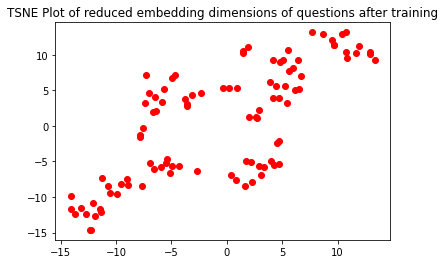

In [ ]:
# we will plot the tsne plot of the top first 100 questions' embeddings
# This plot shows us how similar the first 100 questions' embeddings are as those closer to one another are similar questions
questions = []
for i in range(100):
  questions.append(train_embeds['q_embeds_numpy'][i])
tsne = manifold.TSNE(
    n_components=2,
    init="random",
    random_state=0,
    perplexity=9,
    learning_rate="auto",
    n_iter=300
    )
Y_questions = tsne.fit_transform(np.array(questions))
plt.scatter(Y_questions[:, 0], Y_questions[:, 1], c = 'red')
plt.title('TSNE Plot of reduced embedding dimensions of questions in train data after training')
plt.show()

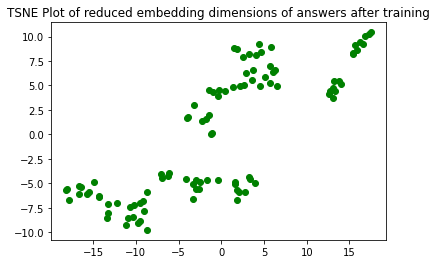

In [ ]:
# we will plot the tsne plot of the top first 100 answers' embeddings
# This plot shows us how similar the first 100 answers' embeddings are as those closer to one another are similar answers
answers = []
for i in range(100):
  answers.append(train_embeds['a_embeds_numpy'][i])
tsne = manifold.TSNE(
    n_components=2,
    init="random",
    random_state=0,
    perplexity=9,
    learning_rate="auto",
    n_iter=300
    )
Y = tsne.fit_transform(np.array(a))
plt.scatter(Y[:, 0], Y[:, 1], c= 'green')
plt.title('TSNE Plot of reduced embedding dimensions of answers in train data after training')
plt.show()

In [ ]:
# preprocessing data for visualisation
val_embeds['a_embeds_numpy'] = val_embeds['a_embeds_numpy'].apply(lambda x: x[2:-2])
val_embeds['a_embeds_numpy'] = val_embeds['a_embeds_numpy'].apply(lambda x: x.split())
val_embeds['a_embeds_numpy'] = val_embeds['a_embeds_numpy'].apply(lambda x: [eval(i) for i in x])
val_embeds['a_embeds_numpy'] = val_embeds['a_embeds_numpy'].apply(lambda x: np.array(x))
val_embeds['q_embeds_numpy'] = val_embeds['q_embeds_numpy'].apply(lambda x: x[2:-2])
val_embeds['q_embeds_numpy'] = val_embeds['q_embeds_numpy'].apply(lambda x: x.split())
val_embeds['q_embeds_numpy'] = val_embeds['q_embeds_numpy'].apply(lambda x: [eval(i) for i in x])
val_embeds['q_embeds_numpy'] = val_embeds['q_embeds_numpy'].apply(lambda x: np.array(x))

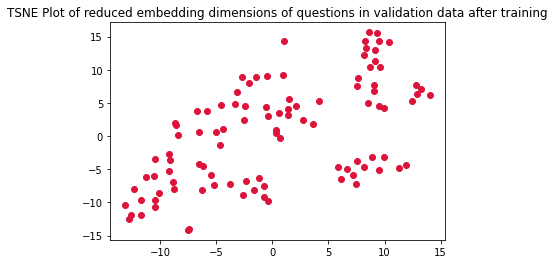

In [ ]:
# we will plot the tsne plot of the first 100 questions' embeddings
# for validation data that has not been seen by the model, we see that the embeddings are more random and no clusters form
# This means that the model is learning to give similar embeddings to similar questions
questions_val = []
for i in range(100):
  questions_val.append(val_embeds['q_embeds_numpy'][i])
tsne = manifold.TSNE(
    n_components=2,
    init="random",
    random_state=0,
    perplexity=9,
    learning_rate="auto",
    n_iter=300
    )
Y_questions_val = tsne.fit_transform(np.array(questions_val))
plt.scatter(Y_questions_val[:, 0], Y_questions_val[:, 1], c = 'crimson')
plt.title('TSNE Plot of reduced embedding dimensions of questions in validation data after training')
plt.show()

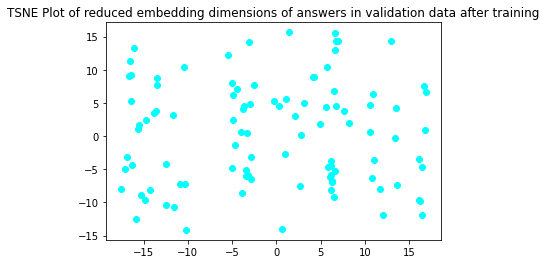

In [ ]:
# for validation data that has not been seen by the model, we see that the embeddings are more random and no clusters form
# This means that the model is learning to give similar embeddings to similar answers
answers_val = []
for i in range(100):
  answers_val.append(val_embeds['a_embeds_numpy'][i])
tsne = manifold.TSNE(
    n_components=2,
    init="random",
    random_state=0,
    perplexity=9,
    learning_rate="auto",
    n_iter=300
    )
Y_answers_val = tsne.fit_transform(np.array(answers_val))
plt.scatter(Y_answers_val[:, 0], Y_questions_val[:, 1], c = 'cyan')
plt.title('TSNE Plot of reduced embedding dimensions of answers in validation data after training')
plt.show()

In [ ]:
train_embeds.head()

,cropped_ques,cropped_ans,Tags,label,q_embeds_numpy,a_embeds_numpy,question_embeds,answer_embeds
0,i have a data frame with 9 observations of two...,since you are using lubridate and dplyr here i...,['r' 'dataframe' 'date' 'sequence'],1.0,[[0. 0. 2.094731 ... 0. ...,[[0.41593006 0. 0. ... 0.85746...,"[0., 0., 2.094731, ..., 0., 0., 0.6888975]","[0., 0., 2.094731, ..., 0., 0., 0.6888975]"
1,i have the following dictionary\nmy_dict = {fi...,i do not know why would you need pandas for th...,['python' 'pandas' 'numpy' 'dictionary' 'nan'],1.0,[[0. 0. 2.0959735 ... 0. ...,[[0.41943327 0. 0. ... 0.86233...,"[0., 0., 2.0959735, ..., 0., 0., 0.6881365]","[0., 0., 2.0959735, ..., 0., 0., 0.6881365]"
2,my athenapresto database has a serialized json...,your json is actually double encoded one ie it...,['sql' 'arrays' 'json' 'presto' 'trino'],1.0,[[0. 0. 2.0951977 ... 0. ...,[[0.4157723 0. 0. ... 0.85966...,"[0., 0., 2.0951977, ..., 0., 0., 0.68954057]","[0., 0., 2.0951977, ..., 0., 0., 0.68954057]"
3,we have a table where one columnvarchar contai...,you do not need to sort the array you can use ...,['sql' 'arrays' 'postgresql' 'csv'],1.0,[[0. 0. 2.094536 ... 0. ...,[[0.41819152 0. 0. ... 0.86245...,"[0., 0., 2.094536, ..., 0., 0., 0.6870307]","[0., 0., 2.094536, ..., 0., 0., 0.6870307]"
4,i want to take and change it to but i am not...,maybe like this\nenummapmy_list fn {a b} &gt ...,['elixir'],1.0,[[0. 0. 2.0944993 ... 0. ...,[[0.4266037 0. 0. ... 0.8628985 ...,"[0., 0., 2.0944993, ..., 0., 0., 0.63774174]","[0., 0., 2.0944993, ..., 0., 0., 0.63774174]"


###Preprocessing stack exchange dataset for gpt-2

In [ ]:
def converting_emb_to_list(embed):
  output=[]
  embed=embed[2:-2] #To remove starting and ending list brackets
  embed=embed.replace('\n','')
  for i in embed.split(' '):
    if i!=' ' and i!='':
      output.append(i)
  return (output)

In [ ]:
#function to l2 normalize
def l2_norm(x):
  x=np.array(x,dtype=np.float64)
  return (x)/(np.linalg.norm(x))

In [ ]:
#preprocessing training and validation embeddings

train_embeds['question_embeds']=train_embeds.q_embeds_numpy.apply(lambda x: converting_emb_to_list(x))
train_embeds['answer_embeds']=train_embeds.q_embeds_numpy.apply(lambda x: converting_emb_to_list(x))
train_embeds['question_embeds_norm']=train_embeds['question_embeds'].apply(lambda x: l2_norm(x))
train_embeds['answer_embeds_norm']=train_embeds['answer_embeds'].apply(lambda x: l2_norm(x))

# validation_embeds['question_embeds']=validation_embeds.short_question_embed_numpy.apply(lambda x: converting_emb_to_list(x))
# validation_embeds['answer_embeds']=validation_embeds.short_answer_embed_numpy.apply(lambda x: converting_emb_to_list(x))
# validation_embeds['question_embeds_norm']=validation_embeds['question_embeds'].apply(lambda x: l2_norm(x))
# validation_embeds['answer_embeds_norm']=validation_embeds['answer_embeds'].apply(lambda x: l2_norm(x))

In [ ]:
train_embeds.head()

,cropped_ques,cropped_ans,Tags,label,q_embeds_numpy,a_embeds_numpy
0,i have a data frame with 9 observations of two...,since you are using lubridate and dplyr here i...,['r' 'dataframe' 'date' 'sequence'],1.0,"[0.0, 0.0, 2.094731, Ellipsis, 0.0, 0.0, 0.688...","[0.41593006, 0.0, 0.0, Ellipsis, 0.8574606, 1...."
1,i have the following dictionary\nmy_dict = {fi...,i do not know why would you need pandas for th...,['python' 'pandas' 'numpy' 'dictionary' 'nan'],1.0,"[0.0, 0.0, 2.0959735, Ellipsis, 0.0, 0.0, 0.68...","[0.41943327, 0.0, 0.0, Ellipsis, 0.86233854, 1..."
2,my athenapresto database has a serialized json...,your json is actually double encoded one ie it...,['sql' 'arrays' 'json' 'presto' 'trino'],1.0,"[0.0, 0.0, 2.0951977, Ellipsis, 0.0, 0.0, 0.68...","[0.4157723, 0.0, 0.0, Ellipsis, 0.85966045, 1...."
3,we have a table where one columnvarchar contai...,you do not need to sort the array you can use ...,['sql' 'arrays' 'postgresql' 'csv'],1.0,"[0.0, 0.0, 2.094536, Ellipsis, 0.0, 0.0, 0.687...","[0.41819152, 0.0, 0.0, Ellipsis, 0.8624552, 1...."
4,i want to take and change it to but i am not...,maybe like this\nenummapmy_list fn {a b} &gt ...,['elixir'],1.0,"[0.0, 0.0, 2.0944993, Ellipsis, 0.0, 0.0, 0.63...","[0.4266037, 0.0, 0.0, Ellipsis, 0.8628985, 1.8..."


In [ ]:
gpt_train_data=train_embeds[['cleaned_question','cleaned_answer','question_embeds_norm','answer_embeds_norm']].copy()
gpt_train_data.columns=['question','answer','q_bert_embeds','a_bert_embeds']
gpt_validation_data=validation_embeds[['cleaned_question','cleaned_answer','question_embeds_norm','answer_embeds_norm']].copy()
gpt_validation_data.columns=['question','answer','q_bert_embeds','a_bert_embeds']

#Saving training and validation data for gpt training
gpt_train_data.to_pickle("./processed_gpt_train_data.pkl")
gpt_validation_data.to_pickle("./processed_gpt_validation_data.pkl")

gpt_train_data.head()

,question,answer,q_bert_embeds,a_bert_embeds
0,converting date sequences to data frame,since you are using <code>lubridate<code> and ...,"[-0.015637585197169696, -0.02392965869212997, ...","[-0.038578456185314094, 0.023714696094727695, ..."
1,drop a dictionary with nan value,i do not know why would you need pandas for th...,"[-0.01877538214606113, -0.02398038568166184, 0...","[-0.03958125630090584, 0.02835506801540352, 0...."
2,athenapresto unnesting list of objects from se...,your json is actually double encoded one ie it...,"[-0.029359731586818844, -0.02273770164673159, ...","[-0.038019164850129655, 0.028997094033155035, ..."
3,postgresql searching by string array,you do not need to sort the array you can use ...,"[-0.01611093521612519, -0.023788602018642593, ...","[-0.03867890207203866, 0.039709786234314884, 0..."
4,elixir list of tuples to list of strings,maybe like this<p>\n<pre><code>enummapmy_list ...,"[-0.020140536656637783, -0.0235070017875882, 0...","[-0.035674850876930835, 0.07124171548691823, -..."


In [ ]:
#loading train and validation for gpt training
gpt_train_data=pd.read_pickle('./processed_gpt_train_data.pkl')
gpt_validation_data=pd.read_pickle('./processed_gpt_validation_data.pkl')

###Similarity Search for similar question-answer pairs
*Ref* :https://www.pinecone.io/learn/vector-indexes/


In [ ]:
ques_bert = gpt_train_data["q_bert_embeds"].tolist()
ans_bert = gpt_train_data["a_bert_embeds"].tolist()
ques_bert = np.array(ques_bert)
ans_bert = np.array(ans_bert)

ques_bert = ques_bert.astype('float32')
ans_bert = ans_bert.astype('float32')

num = 128  # number of cells/clusters to partition data into

quantizer = faiss.IndexFlatIP(ans_bert.shape[-1])
ind = faiss.IndexIVFFlat(quantizer, ans_bert.shape[-1], num)

# training the index to cluster into cells
ind.train(ans_bert)
ind.add(ans_bert)

ind.nprobe = 8  # set how many of nearest cells to search


In [ ]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tf_gpt2_model = TFGPT2LMHeadModel.from_pretrained("gpt2")

*Ref*: https://suniljammalamadaka.medium.com/medical-chatbot-using-bert-and-gpt2-62f0c973162f

In [ ]:

def gpt_data_with_similar_pairs(question,answer,question_embedding):
  topk=20 #Number of similar q-a pairs to search for
  scores,indices=ind.search(np.array([question_embedding]).astype('float32'), topk)
  sim_qa=gpt_train_data.iloc[indices.reshape(topk)]

  line = '#Q: %s #A: %s ' % (question, answer)
  encoded_len=len(tokenizer.encode(line))

  for i in sim_qa.iterrows():

    line='#Q: %s #A: %s ' % (i[1]['question'],i[1]['answer']) + line

    # line=line.replace('\n','')

    encoded_len=len(tokenizer.encode(line))
    if encoded_len>=1024:
      break

  gpt_row =  tokenizer.encode(line)[-1024:]
  if 1303 in gpt_row:
    gpt_row =gpt_row
  else:
    gpt_row[0] =1303
  return gpt_row

###Preparing gpt data with context

In [ ]:
#Data for training and validation of gpt model
gpt_train_data['gpt_qa_data']=gpt_train_data.apply(lambda x: gpt_data_with_similar_pairs(x.question,x.answer,x.q_bert_embeds),axis=1)
gpt_validation_data['gpt_qa_data']=gpt_validation_data.apply(lambda x: gpt_data_with_similar_pairs(x.question,x.answer,x.q_bert_embeds),axis=1)

Token indices sequence length is longer than the specified maximum sequence length for this model (1032 > 1024). Running this sequence through the model will result in indexing errors


In [ ]:
#function to get the start of positive mask to be used while creating the masks
def start_of_mask(data):

  return 1024-data[::-1].index(1303)+1  # 1303 is Token for '#' character

In [ ]:
#Calculation of start of the mask
gpt_train_data['start_of_mask']=gpt_train_data['gpt_qa_data'].apply(lambda x: start_of_mask(x))
gpt_validation_data['start_of_mask']=gpt_validation_data['gpt_qa_data'].apply(lambda x: start_of_mask(x))

#finding length of the data for dataset
gpt_train_data['length']=gpt_train_data['gpt_qa_data'].apply(lambda x: len(x))
gpt_validation_data['length']=gpt_validation_data['gpt_qa_data'].apply(lambda x: len(x))

In [ ]:
#function to create mask
def create_mask(start_of_mask):
  return [0]*start_of_mask+[1]*(1024-start_of_mask)

In [ ]:
#creating mask for data
gpt_train_data['mask']=gpt_train_data['start_of_mask'].apply(lambda x: create_mask(x))
gpt_validation_data['mask']=gpt_validation_data['start_of_mask'].apply(lambda x: create_mask(x))

In [ ]:
#saving train gpt data with loss mask to disk
gpt_train_data.to_pickle('./gpt_train_data.pkl')
gpt_validation_data.to_pickle('./gpt_validation_data.pkl')

In [ ]:
#loading gpt train and validation data from disk
gpt_train_data=pd.read_pickle('./gpt_train_data.pkl')
gpt_validation_data =pd.read_pickle('./gpt_validation_data.pkl')

In [ ]:
gpt_train_data[gpt_train_data['length']<1024].shape

(7448, 8)

In [ ]:
gpt_validation_data[gpt_validation_data['length']<1024].shape

(1884, 8)

In [ ]:
gpt_train_data=gpt_train_data[gpt_train_data['length']==1024]
gpt_validation_data=gpt_validation_data[gpt_validation_data['length']==1024]

In [ ]:
#extracting gpt data for train and validation set
#Train
train_data=[]
for i in gpt_train_data['gpt_qa_data'].values:
  train_data.append(i)
train_data=np.array(train_data)

#Validation
validation_data=[]
for i in gpt_validation_data['gpt_qa_data'].values:
  validation_data.append(i)
validation_data=np.array(validation_data)

In [ ]:
#Creating train and validation mask
train_mask=[]
for i in gpt_train_data['mask'].values:
  train_mask.append(i)
train_mask=np.array(train_mask)

validation_mask=[]
for i in gpt_validation_data['mask'].values:
  validation_mask.append(i)
validation_mask=np.array(validation_mask)

In [ ]:
#TF DATASET

#TRAINING
BATCH_SIZE = 1
BUFFER_SIZE = 2
train_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'context': train_data,

        'label': train_data[:,1:],
         'mask': train_mask[:,:-1]

    },
))


train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)

# VALIDATION
validation_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'context': validation_data,

        'label': validation_data[:,1:],
        'mask':validation_mask[:,:-1]
    },
))

validation_dataset = validation_dataset.shuffle(BUFFER_SIZE)
validation_dataset = validation_dataset.batch(BATCH_SIZE)
validation_dataset = validation_dataset.prefetch(tf.data.experimental.AUTOTUNE)

###Custom Training of gpt-2 model

In [ ]:
#TRAINING
learning_rate=0.0001
optim=tf.optimizers.Adam(learning_rate)
j=0
loss_cum=0
epoch_loss=0
stop_training=False
epochs=2
for epoch in range(epochs):
  print('epoch',epoch)
  for i in train_dataset:
    with tf.GradientTape() as tape:
      context=i[0]['context']
      loss_mask=tf.cast(i[0]['mask'],tf.float32)
      output=tf_gpt2_model(context,training=True)['logits']
      loss_value = tf.reduce_sum(tf.nn.sparse_softmax_cross_entropy_with_logits(
                    labels=np.array(i[0]['label']), logits=output[ :,:-1])*loss_mask)
      j=j+1
      loss_cum+=loss_value
      epoch_loss+=loss_value/100
      if j%50==0:
        print(loss_cum/50)
        grads=tape.gradient(loss_cum/50,tf_gpt2_model.trainable_variables)
        optim.apply_gradients(zip(grads,tf_gpt2_model.trainable_variables))
        loss_cum=0
      if tf.math.is_nan(loss_value):
        print('loss became nan')
        stop_training=True
        break
      if j%10000==0:
        tf_gpt2_model.save_pretrained("tf_gpt2_model_2_10"+str(epoch)+'_'+str(j))
  print('epoch_loss by 100',epoch_loss/237)
  epoch_loss=0
  if stop_training:
    break
  tf_gpt2_model.save_pretrained("tf_gpt2_model_2_10"+str(epoch))



epoch 0
tf.Tensor(1944.17, shape=(), dtype=float32)
tf.Tensor(1514.5553, shape=(), dtype=float32)
tf.Tensor(1783.4224, shape=(), dtype=float32)
tf.Tensor(1864.697, shape=(), dtype=float32)
tf.Tensor(1582.2037, shape=(), dtype=float32)
tf.Tensor(1709.5188, shape=(), dtype=float32)
tf.Tensor(1672.7097, shape=(), dtype=float32)
tf.Tensor(1598.7911, shape=(), dtype=float32)
tf.Tensor(1852.2965, shape=(), dtype=float32)
tf.Tensor(1718.2518, shape=(), dtype=float32)
tf.Tensor(1500.321, shape=(), dtype=float32)
tf.Tensor(1614.9736, shape=(), dtype=float32)
tf.Tensor(1677.2644, shape=(), dtype=float32)
tf.Tensor(1698.4705, shape=(), dtype=float32)
tf.Tensor(1608.0522, shape=(), dtype=float32)
tf.Tensor(1739.8071, shape=(), dtype=float32)
tf.Tensor(1583.4692, shape=(), dtype=float32)
tf.Tensor(1457.8872, shape=(), dtype=float32)
tf.Tensor(1603.6355, shape=(), dtype=float32)
tf.Tensor(1473.3799, shape=(), dtype=float32)
tf.Tensor(1488.1143, shape=(), dtype=float32)
tf.Tensor(1371.0133, shape=(),

In [ ]:
#loading the gpt2 model from the above saved checkpoint
tf_gpt2_model=TFGPT2LMHeadModel.from_pretrained("./tf_gpt2_model_2_105")

All model checkpoint layers were used when initializing TFGPT2LMHeadModel.

All the layers of TFGPT2LMHeadModel were initialized from the model checkpoint at ./tf_gpt2_model_2_105.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


###Inference

In [ ]:
question_embedder=tf.keras.models.load_model('./question_embedder')


In [ ]:
#preparing the faiss search

gpt_train_data=pd.read_pickle('./processed_gpt_train_data.pkl')
ques_bert = gpt_train_data["q_bert_embeds"].tolist()
ans_bert = gpt_train_data["a_bert_embeds"].tolist()
ques_bert = np.array(ques_bert)
ans_bert = np.array(ans_bert)

ques_bert = ques_bert.astype('float32')
ans_bert = ans_bert.astype('float32')

num = 128  # number of cells/clusters to partition data into
q_quantizer = faiss.IndexFlatIP(ques_bert.shape[-1])
a_quantizer = faiss.IndexFlatIP(ans_bert.shape[-1])
q_ind = faiss.IndexIVFFlat(q_quantizer, ques_bert.shape[-1], num)
a_ind = faiss.IndexIVFFlat(a_quantizer, ans_bert.shape[-1], num)


# training the index to cluster into cells
q_ind.train(ques_bert)
q_ind.add(ques_bert)

a_ind.train(ans_bert)
a_ind.add(ans_bert)


q_ind.nprobe = 8  # set how many of nearest cells to search
a_ind.nprobe = 8


In [ ]:
def gpt_data_prep(question,question_embedding):
  topk=20
  scores,indices=a_ind.search(
                  question_embedding.astype('float32'), topk)
  q_sub=gpt_train_data.iloc[indices.reshape(20)]

  line = '#Q: %s #A: ' % (
                        question)
  encoded_len=len(tokenizer.encode(line))
  for i in q_sub.iterrows():
    line='#Q: %s #A: %s ' % (i[1]['question'],i[1]['answer']) + line
    line=line.replace('\n','')
    encoded_len=len(tokenizer.encode(line))
    if encoded_len>=1024:
      break
  return tokenizer.encode(line)[-1024:]

In [ ]:
#function to generate answer given a question and the required answer length
def predict(question,answer_len=20):
  preprocessed_question=preprocess(question)
  question_len=len(preprocessed_question.split(' '))
  truncated_question=preprocessed_question
  if question_len>500:
    truncated_question=' '.join(preprocessed_question.split(' ')[:500])
  encoded_question= tokenizer.encode(truncated_question)
  max_length=512
  padded_question=tf.keras.preprocessing.sequence.pad_sequences(
      [encoded_question], maxlen=max_length, padding='post')
  question_mask=[[1 if token!=0 else 0 for token in question] for question in padded_question]
  embeddings=question_embedder({'question':np.array(padded_question),'question_mask':np.array(question_mask)})
  gpt_input=gpt_data_prep(truncated_question,embeddings.numpy())
  mask_start = len(gpt_input) - list(gpt_input[::-1]).index(1303) + 1
  input=gpt_input[:mask_start+1]
  if len(input)>(1024-answer_len):
   input=input[-(1024-answer_len):]
  gpt2_output=tokenizer.decode(tf_gpt2_model.generate(input_ids=tf.constant([np.array(input)]),max_length=1024,temperature=0.7)[0])
  answer=gpt2_output.rindex('#A: ')
  return gpt2_output[answer+len('#A: '):]




In [ ]:
#testing final_func1 on sample input
answer=predict('How do I learn coding')
print("answer:",answer)

**Conclusion**

Our model produced decent results provided the limited training time and lesser data.
Training both bert and gpt-2 requires high amount of RAM and GPU Runtime.
Not able to train on full question and answer length due to limited memory available.
Future work:
Future work may focus on finding various techniques to deal with training on full length sequence data.
Training on more number of epochs and more diverse data from different communities can greatly enhance generated answers.
